<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#C20E83;overflow:hidden;font-weight:800">Bank Customer Churn Prediction</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Context**

It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

**Content**

Various Bank detail is given like CustomerID , surname, Credit score and many more.

**Acknowledgements**

This dataset is originated from a U.S. bank .

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Import Libraries</div></b>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
file = "/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv"
df = pd.read_csv(file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [4]:
# Check Dataset

print('### 5 sample ###','\n')
df.sample(5)

### 5 sample ### 



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2821,2822,15626385,George,714,Spain,Female,33,10,103121.33,2,1,1,49672.01,0
1137,1138,15645269,Duncan,583,France,Female,42,4,0.00,2,1,0,17439.66,0
7347,7348,15811742,Jen,553,Spain,Male,42,7,0.00,2,1,0,7680.23,0
841,842,15737792,Abbie,818,France,Female,31,1,186796.37,1,0,0,178252.63,0
8251,8252,15751032,Enemuo,629,Germany,Female,37,1,35549.81,2,0,0,49676.33,0


In [5]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [6]:
# Check Dataframe information

print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Null Data

print('### Total Null Data in DataFrame ###','\n')
df.isnull().sum().sum()

### Total Null Data in DataFrame ### 



0

In [8]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [9]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
# Numeric features

df.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
Exited,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

**Let's analyze all the variables and their relationships with the target variable "Exited".**

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#C20E83'> Exited</span></b>

**0 = No-Exited**

**1 = Exited**

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

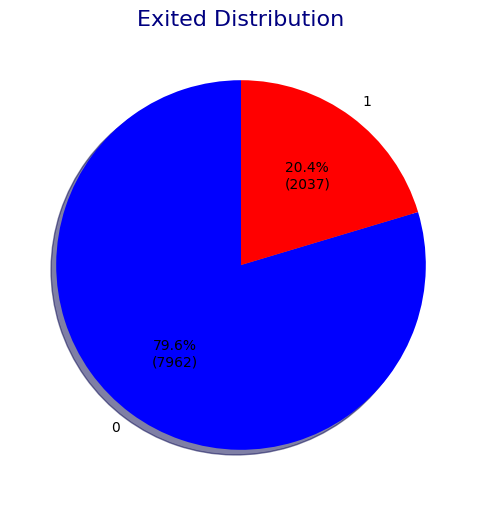

In [12]:
# Exited

ex_counts=df.Exited.value_counts()
plt.figure(figsize=(12,6))
plt.title('Exited Distribution',size=16,color='navy')


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(ex_counts,
        labels=ex_counts.index,
        autopct=lambda pct: func(pct,ex_counts),
        startangle=90,
        colors=("blue","red"),
        shadow=True);

## Conclusions - Exited

**1. We can note that 7962 of Customers are in group No-exited and 2037 in group Exited.**

**2. Therefore, 79.6% of Customers are in the No-exited group.**

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#C20E83'> CreditScore</span></b>  

In [13]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

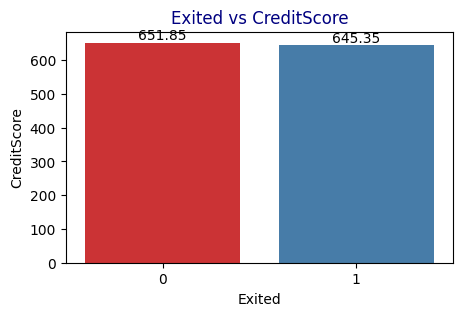

In [14]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'CreditScore', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'CreditScore',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - CreditScore

**1. We note that the CreditScore is practically the same for the 2 groups, with a slightly higher value for group No-exited(0).**

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#C20E83'> Geography</span></b>  

In [15]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

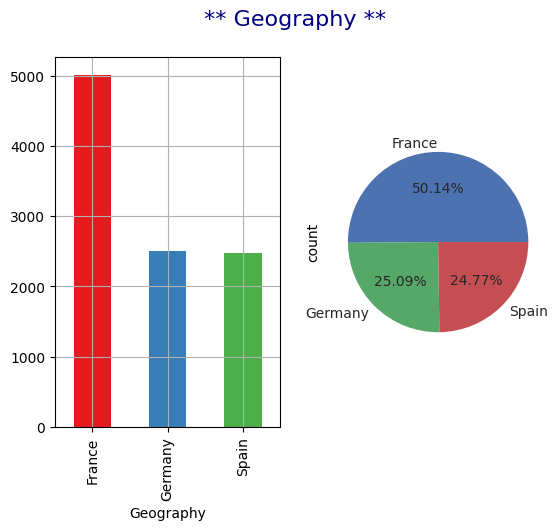

In [16]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'Geography' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['Geography'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['Geography'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

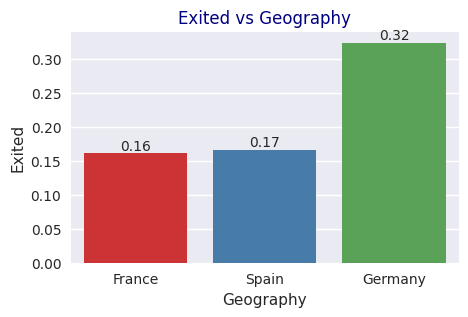

In [17]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Geography', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Geography',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - Geography

**1. We conclude that the country with the highest number of 'Exited' is Germany, with an average of 0.32. This means that in Germany 32% are from the 'Exited' group.**

**2. On the other hand, France has the largest number of customers.**


### <b><span style='color:#DEB078'>5.4|</span><span style='color:#C20E83'> Gender</span></b>  

In [18]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

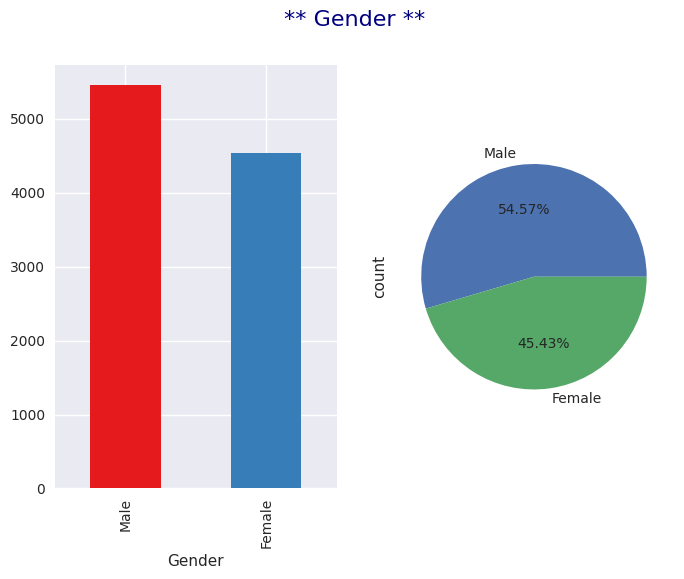

In [19]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'Gender' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

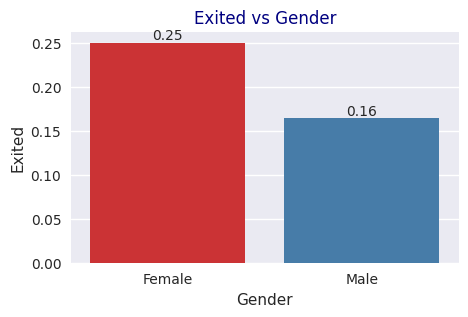

In [20]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Gender', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Gender',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - Gender

**1. We conclude that the Gender with the highest number of 'Exited' is Female, with an average of 0.25.**

**2. The Male gender has the majority of Customers, with 54.57%.**

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#C20E83'> Age</span></b>  

In [21]:
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

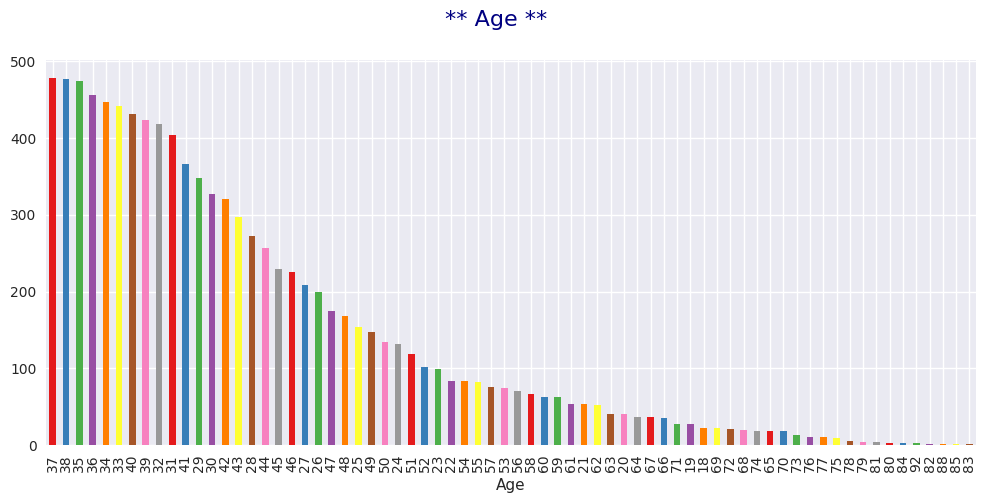

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('** ' + 'Age' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
df['Age'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.show()

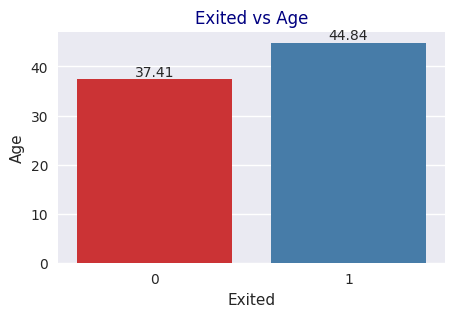

In [23]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'Age', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Age',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - Age

**1. We conclude that the Age with the highest mean is group 1 (Exited), with an average of 44.84 years. In other words, the 'Exited' group has a higher average age than the 'No-exited' group.**

### <b><span style='color:#DEB078'>5.6 |</span><span style='color:#C20E83'> Tenure</span></b>  

In [24]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

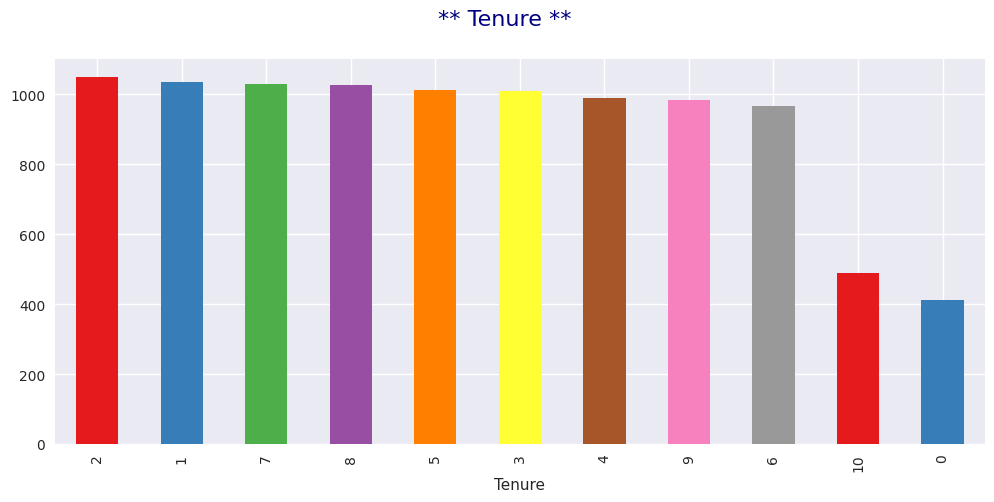

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('** ' + 'Tenure' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
df['Tenure'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.show()

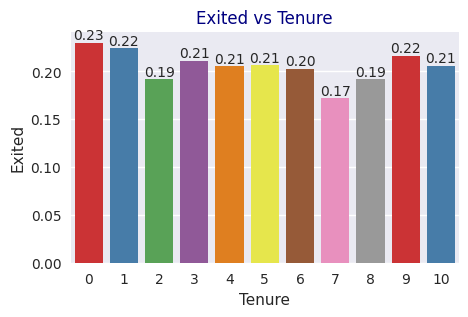

In [26]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Tenure', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Tenure',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - Tenure

**1. We conclude that the Tenure with the highest mean of 'Exited' is Tenure = 0 and the lowest is Tenure = 7.**

**2, On the other hand, Tenure 2 has the highest number of Customers (1048) and Tenure 0 has the lowest (413).**


### <b><span style='color:#DEB078'>5.7 |</span><span style='color:#C20E83'> Balance</span></b>  

In [27]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

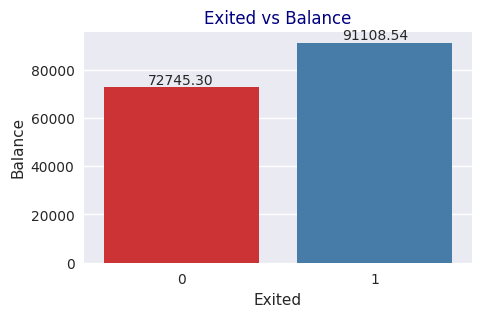

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'Balance', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Balance',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - Balance

**1. We conclude that the Balance with the highest mean is group 1 (Exited), with average = 91108,54.**

### <b><span style='color:#DEB078'>5.8 |</span><span style='color:#C20E83'> NumOfProducts</span></b>  

In [29]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

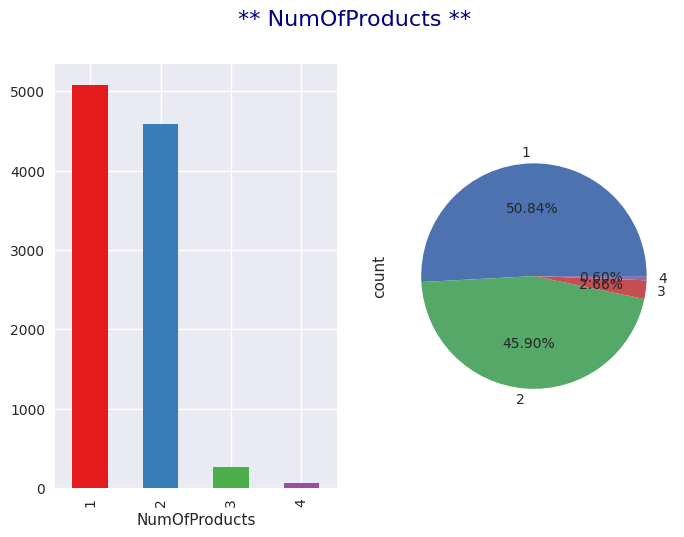

In [30]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'NumOfProducts' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['NumOfProducts'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['NumOfProducts'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

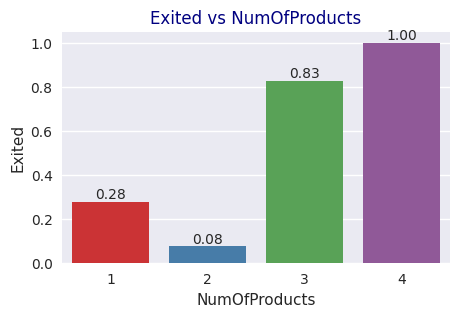

In [31]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'NumOfProducts', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'NumOfProducts',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - NumOfProducts

**1. We conclude that customers with 4 and 3 products have a higher average of Exited, but we must emphasize that there are few customers who have these quantities of products.**

**2. Customers who have 2 products are the ones with the lowest average for Exited, that is, they are the ones with the lowest propensity to Churn.**

**3. Reinforcing that the largest number of customers are those with 1 NumOfProducts (5084), followed by customers with 2 NumOfProducts (4590).**



### <b><span style='color:#DEB078'>5.9 |</span><span style='color:#C20E83'> HasCrCard</span></b>  

In [32]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

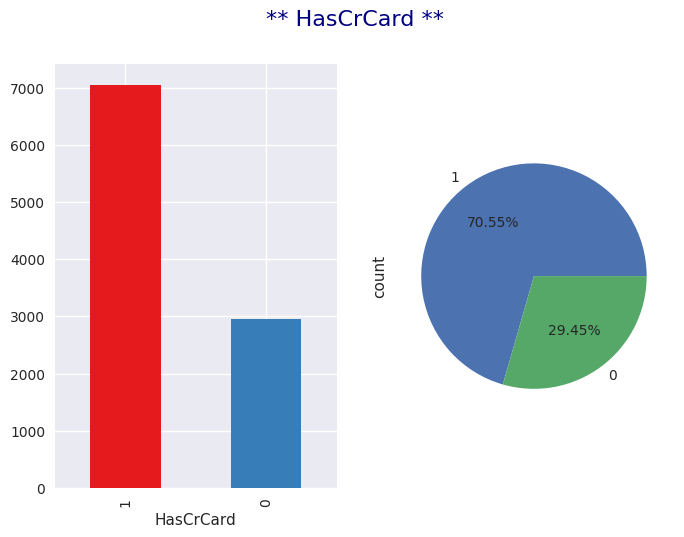

In [33]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'HasCrCard' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['HasCrCard'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['HasCrCard'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

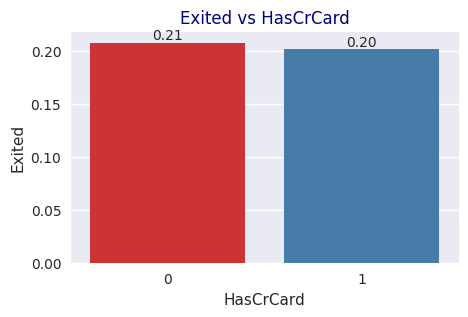

In [34]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'HasCrCard', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'HasCrCard',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - HasCrCard

**1. We note that the HasCrCard is practically the same for the 2 groups, with a slightly higher value for group 0.**

**2. We can also see that HasCrCard = 1 has the most customers (7055) or 70.55%.**

### <b><span style='color:#DEB078'>5.10 |</span><span style='color:#C20E83'> IsActiveMember</span></b>  

In [35]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

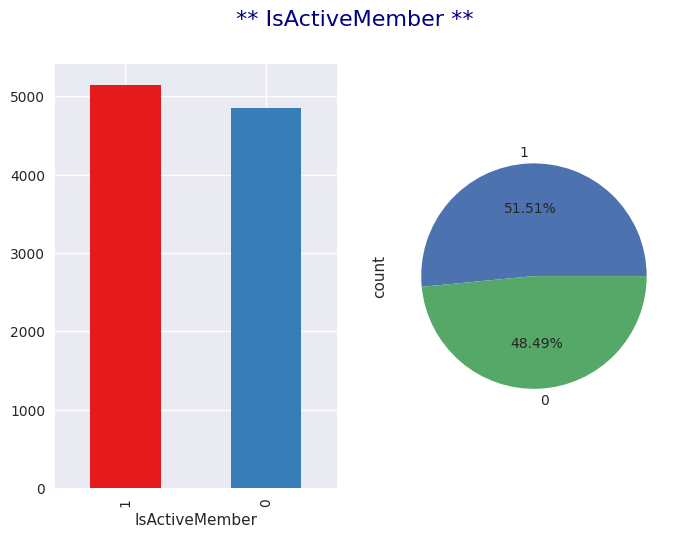

In [36]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'IsActiveMember' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['IsActiveMember'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['IsActiveMember'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

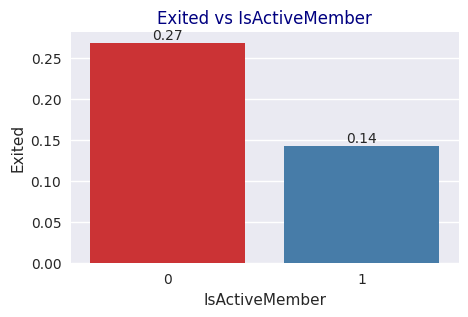

In [37]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'IsActiveMember', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'IsActiveMember',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

## Conclusions - IsActiveMember

**1. We conclude that the IsActiveMember with the highest mean of 'Exited' is group 0 (No-Exited), with average = 0,27.**

### <b><span style='color:#DEB078'>5.11|</span><span style='color:#C20E83'> EstimatedSalary</span></b>  

In [38]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

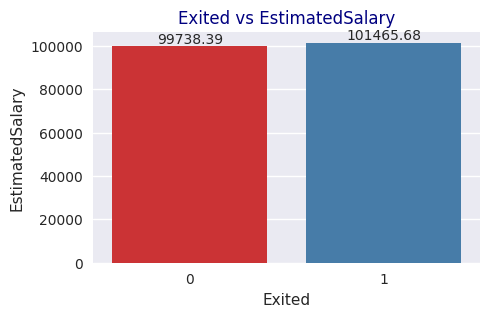

In [39]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'EstimatedSalary', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'EstimatedSalary',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusions - EstimatedSalary

**1. We note that the EstimatedSalary is practically the same for the 2 groups, with a slightly higher value for group 1 (Exited).**

## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Machine Learning</div></b>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [41]:
# transforming 'object' to numerical columns with LabelEncoder

labelencoder = LabelEncoder()
df_final = df.copy()
df_final["Geography"] = labelencoder.fit_transform(df_final["Geography"])
df_final["Gender"] = labelencoder.fit_transform(df_final["Gender"])
df_final.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


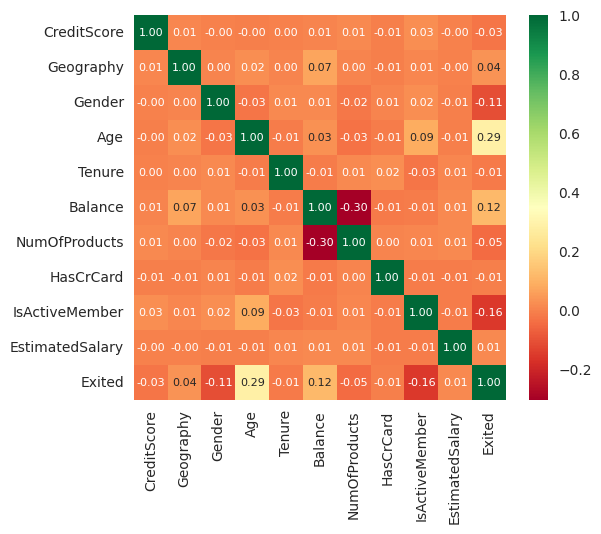

In [42]:
# Heatmap

df_corr = df_final.corr()
f, ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 8}, ax=ax)
plt.show()

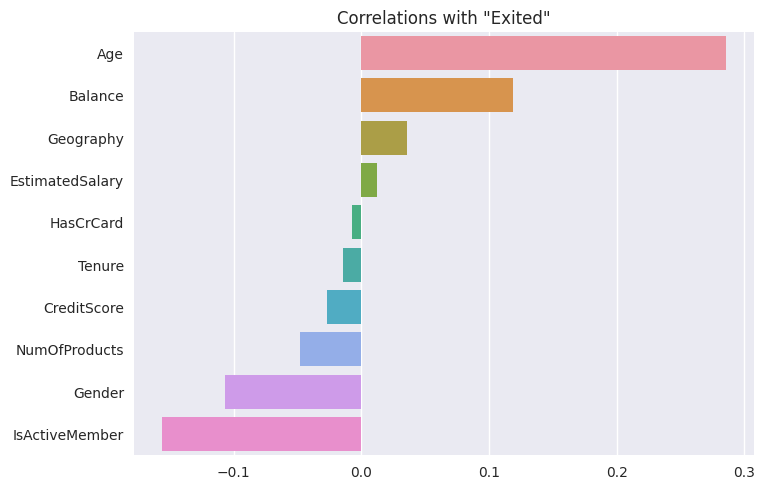

In [43]:
# Correlations with "Exited"

limit = -1.0

data = df_final.corr()["Exited"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Exited"')
plt.show()

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#C20E83'> CatBoostClassifier</span></b>


In [44]:
# assign X and y values
X,y=df_final.drop("Exited",axis=1),df_final[['Exited']]

In [45]:
from sklearn.model_selection import train_test_split

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000, 1), (3000, 1))

In [46]:
# Classification Algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from catboost import CatBoostClassifier

ct=CatBoostClassifier(verbose=False)
ct.fit(X_train,y_train)

In [47]:
# Predict the Test set results

y_pred = ct.predict(X_test)

In [48]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8737


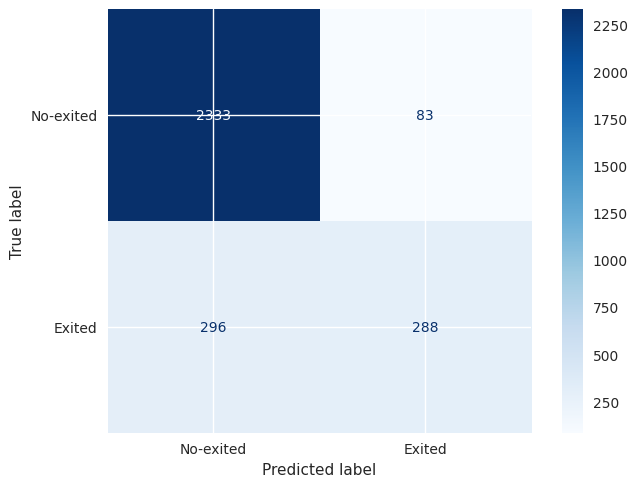

In [49]:
# ConfusionMatrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['No-exited', 'Exited'])

In [50]:
# classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.78      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.87      0.87      0.86      3000



## <b><div style='padding:15px;background-color:#C20E83;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>